## Use case 2: Shower profile

In [1]:
import ToyModel as tm

#### Construction of an atmosphere and a shower profile

In [2]:
## Default U.S. standard atmosphere, corresponding to the atmospheric model 1 of CORSIKA, with default discretization
# atmosphere = tm.Atmosphere()
# atmosphere.h0 #Default observation level
## A different atmospheric model (more models to be implemented) with user-defined discretization
atmosphere = tm.Atmosphere(h0=1.8, h_top=100., model=17, N_steps=600)
#Atmospheric profile stored in an Atmosphere object, subclass of DataFrame
#atmosphere?

In [3]:
## Some attributes and methods of Atmosphere objects
print("Observation level in km a.s.l.:", atmosphere.h0)
print("Height (km a.s.l.) corresponding to a vertical depth of 50 g/cm2:", atmosphere.Xv_to_h(50.))

Observation level in km a.s.l.: 1.8
Height (km a.s.l.) corresponding to a vertical depth of 50 g/cm2: 20.699903736887787


In [4]:
## Default profile: Greisen function for a vertical shower induced by a gamma ray of 10 TeV
#profile = tm.Profile()
#profile.X_max #If not given, the depth of maximum is obtained from the Heitler model
#profile.atmosphere #If not given, the default atmosphere and discretization are used
## Greisen profile for a 1000 GeV shower (energy in MeV) with zenith angle of 20 degrees in a given atmosphere
profile = tm.Profile(E=1000000, theta=20., X_max=300., atmosphere=atmosphere)
## Equivalent procedure without generating the atmosphere in one step
#profile = tm.Profile(E=1000000, theta=20., X_max=300., h0=1.8, h_top=100., model=17, N_steps=600)
#profile.atmosphere

In [5]:
## Gaisser-Hillas profile for a 1 EeV proton shower. X_max and X0 are specified but a default value for lambda is used
profile = tm.Profile(E=1.e12, theta=20., prf_model='Gaisser-Hillas', X_max=500., X0_GH=-10.)
#profile.lambda_GH #If not given, the model parameter lambda at given energy is interpolated from Auger data

In [6]:
## The profile can also be produced from numerical data of an energy deposit profile (e.g., from CORSIKA)
## A DataFrame has to be generated with two columns: slant depth in g/cm2 and dE/dX in MeV.cm2/g
import pandas as pd
prf_model = pd.read_fwf('./Edep_profile_1000GeV_1000sh_0deg.dat', skiprows = 12, names=['X', 'dE_dX'])
prf_model.dE_dX *= 1000./10. # Original data is given in GeV in steps of 10 g/cm2
profile2 = tm.Profile(E=1000000., theta=0., prf_model=prf_model)

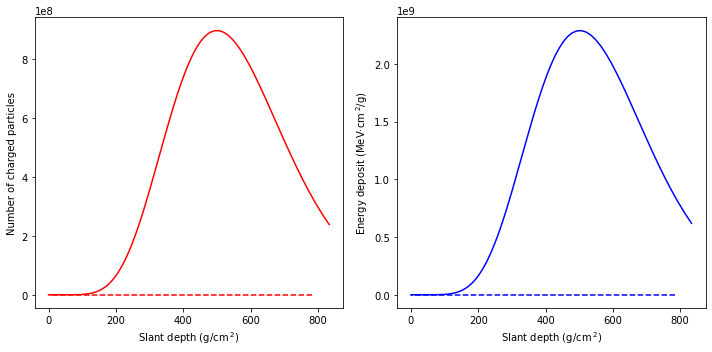

In [7]:
## Profile visualization: Number of charged particles with energy threshold of 1 MeV and energy deposit profile in MeV.cm2/g
#profile.show();
## Comparison of two profiles in same plot
ax1, ax2 = profile.show();
ax1.plot(profile2.X, profile2.N_ch, 'r--');
ax2.plot(profile2.X, profile2.E_dep/profile2.dX, 'b--');

In [8]:
## Help on Atmosphere constructor
#tm.Atmosphere?
## Help on Atmosphere object
#atmosphere?
## Help on Profile constructor
#tm.Profile?
## Help on Profile object
#profile?

#### Fluorescence and Cherenkov light production

In [9]:
## Constructor of Fluorescence and Cherenkov objects
fluorescence = tm.Fluorescence(profile)
cherenkov = tm.Cherenkov(profile)
## Equivalent methods of Profile
#fluorescence = profile.Fluorescence()
#cherenkov = profile.Cherenkov()
## Data stored in objects, subclasses of DataFrame
#fluorescence
cherenkov

,N_ph,a,theta_c,b,theta_cc
0,4.119228e+11,1.067838,5.245851,0.030690,19.748192
1,4.664013e+11,1.061112,5.213798,0.029594,20.108454
2,5.238580e+11,1.054313,5.181940,0.028536,20.464699
3,5.830164e+11,1.047441,5.150278,0.027516,20.816863
4,6.445771e+11,1.040498,5.118809,0.026533,21.164881
...,...,...,...,...,...
545,6.111000e-05,0.424890,0.080405,0.055108,0.844977
546,6.110892e-05,0.424890,0.080405,0.055108,0.844977
547,6.110785e-05,0.424890,0.080405,0.055108,0.844977
548,6.110677e-05,0.424890,0.080405,0.055108,0.844977


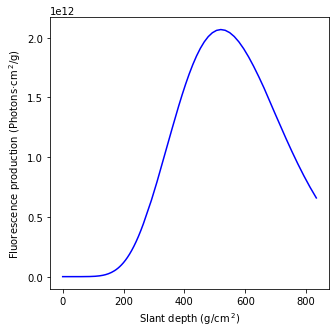

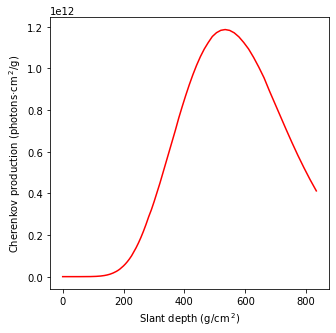

In [10]:
## Visualization of light production in the 290 - 430 nm range
fluorescence.show();
cherenkov.show();

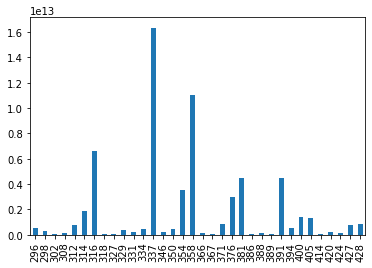

In [11]:
## Fluorescence production is evaluated at 34 bands
fluorescence.sum().plot(kind='bar');

In [12]:
## Help on Fluorescence and Cherenkov objects
#fluorescence?
#cherenkov?

#### Shower objects

In [13]:
## A Shower object contains both the track and the profile of a shower along with an atmosphere can be generated in one step
#shower = tm.Shower() #Default shower
#Setting the ground interaction point, energy, zenith and azimuth angles, X_max and atmospheric profile
shower = tm.Shower(x0=0.5, y0=0.1, E=1000000, theta=20., az= 30., X_max=300., h0=1.8, h_top=100., model=17, N_steps=600)
shower.atmosphere
#shower.track
#shower.profile
#shower.fluorescence
#shower.cherenkov

,h,X_vert,rho,temp,P,P_w,E_th,r_M
0,1.881833,821.965364,1.018359e-03,275.794943,806.348022,0.0,23.426743,0.094323
1,2.045500,805.440347,1.001041e-03,274.925426,790.136980,0.0,23.628520,0.095954
2,2.209167,789.196339,9.840185e-04,274.040868,774.201608,0.0,23.832034,0.097614
3,2.372833,773.228562,9.672851e-04,273.141007,758.537220,0.0,24.037301,0.099303
4,2.536500,757.532320,9.508363e-04,272.225579,743.139206,0.0,24.244334,0.101021
...,...,...,...,...,...,...,...,...
595,99.263500,0.001372,1.269746e-09,369.184938,0.001346,0.0,20984.958249,75648.450808
596,99.427167,0.001351,1.241879e-09,371.814407,0.001326,0.0,21219.097993,77345.963977
597,99.590833,0.001331,1.214623e-09,374.502880,0.001306,0.0,21455.850152,79081.568486
598,99.754500,0.001312,1.187966e-09,377.251681,0.001287,0.0,21695.243874,80856.119088


In [14]:
## Some attributes of track, profile and atmosphere can be accessed as attributes of shower
print("Depth of maximum:", shower.X_max) #Equivalent to shower.profile.X_max
print("Coordinates of ground interaction point:", (shower.x0, shower.y0) ) #Equivalent to (shower.track.x0, shower.track.y0)

Depth of maximum: 300.0
Coordinates of ground interaction point: (0.5, 0.1)


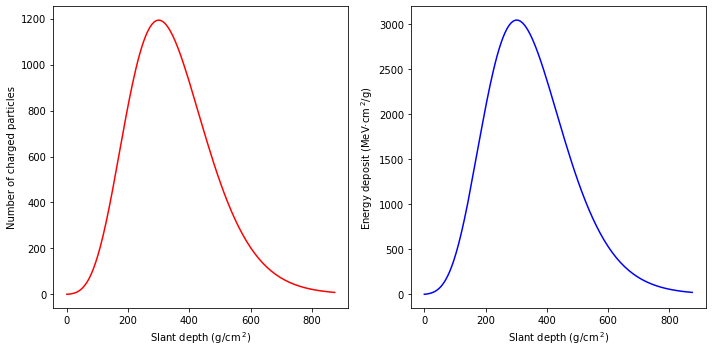

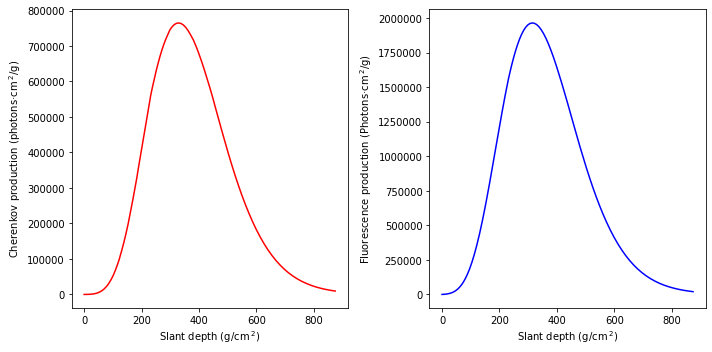

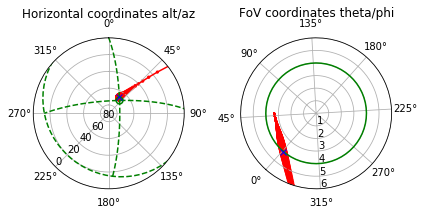

In [15]:
## There are some inherited methods as well
shower.show_profile()
shower.show_light_production()
#telescope = tm.Telescope(x=0.1, y=-0.2, z=0.1, alt=70., az=40.)
#projection = shower.Projection(telescope)
#projection.show(max_theta=6.);
## Equivalent procedure in one step with additional features:
## X_mark is set to X_max by default
## Size of track points are proportional to shower size (i.e., column N_ch of profile)
shower.show_projection(tm.Telescope(x=0.1, y=-0.2, z=0.1, alt=70., az=40.), max_theta=6.);

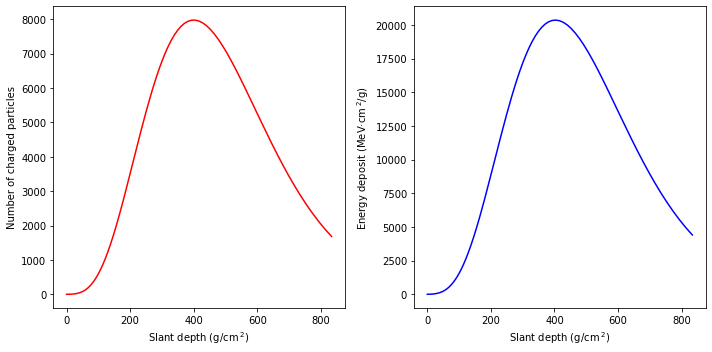

In [16]:
## Method to make copies of a shower object with optional changes
#shower2 = shower.copy() #Identical copy
shower2 = shower.copy(E=10000000., X_max=400.,prf_model='Gaisser-Hillas') #Same atmosphere and track, but different profile
shower2.show_profile();

In [17]:
## Help on constructor of Shower
#tm.Shower?
## Help on Shower object
#shower2?